# **Title: SentiTube - YouTube Comment Sentiment Analysis: Unveiling Insights from Popularity and User Engagement**

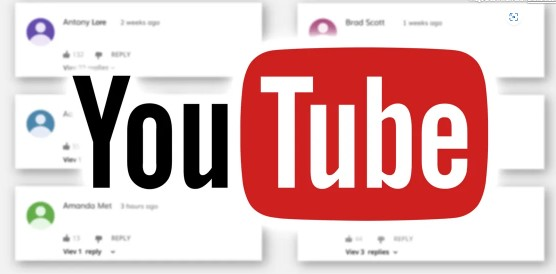

**Overview/Introduction:**
The YouTube Comment Sentiment Analysis project aims to leverage natural language processing (NLP) techniques to analyze the sentiment of comments on popular YouTube videos. By exploring the relationship between the popularity of a video and the sentiments expressed in its top comments, we can gain valuable insights into user engagement, audience preferences, and the impact of sentiment on video performance.

**Problem Statement:**
YouTube has become a thriving platform for content creators and advertisers alike. Understanding the sentiment behind user comments is crucial for video creators, as it allows them to gauge the reception of their content and engage with their audience effectively. Additionally, businesses and advertisers can utilize sentiment analysis to evaluate the impact of their promotional campaigns and tailor their strategies accordingly. However, manually analyzing a large number of comments is time-consuming and impractical. Therefore, there is a need for an automated solution that can accurately classify comments based on sentiment and provide valuable insights for various stakeholders.

**Objectives:**
The primary objective of this project is to develop an AI-powered sentiment analysis model that can effectively analyze and classify comments on YouTube videos. The key objectives include:

- Sentiment Classification: Train a machine learning model using the provided dataset to accurately classify comments as negative, neutral, or positive based on sentiment.

- Insights and Recommendations: Provide insightful analytics and visualizations to help content creators, marketers, and advertisers gain a deeper understanding of user sentiments and tailor their strategies accordingly. This can include identifying popular video genres, influential commenters, and sentiment-driven content optimization recommendations.

**Dataset Description:**
The dataset for this project consists of two files: comments.csv and videos-stats.csv. The comments.csv file contains the top ten most relevant comments for each video, along with their sentiments and likes. Each comment is associated with a video ID, comment text, number of likes, and sentiment score.

The dataset serves as a valuable resource for training and evaluating the sentiment analysis model. By analyzing this dataset, we can build a robust AI system capable of accurately categorizing comments based on their sentiment. This model can then be deployed to analyze comments on other YouTube videos and provide insights into user sentiments and preferences.

By applying sentiment analysis to YouTube comments, this project has the potential to address important issues such as:

- Content Quality Assessment: Content creators can use sentiment analysis to evaluate the quality and impact of their videos. By understanding the sentiments expressed in the comments, they can identify areas for improvement and optimize their content strategy to better resonate with their audience.

- Audience Engagement: Marketers and advertisers can leverage sentiment analysis to gauge the effectiveness of their promotional campaigns on YouTube. By analyzing the sentiments expressed in the comments, they can assess the engagement levels and adjust their marketing strategies accordingly.

- Community Management: Sentiment analysis can help YouTube channel moderators and community managers monitor and manage comments more effectively. By identifying negative sentiments early on, they can promptly address any issues, foster a positive community environment, and enhance user experience.

**Dataset URL:** https://www.kaggle.com/datasets/advaypatil/youtube-statistics

**Technologies Used:**
Python, Pandas, NumPy, scikit-learn, TensorFlow, TensorFlow Hub, imbalanced-learn, colorama

**Methodology:**
- Data Loading and Preprocessing: Load the dataset using Pandas, perform preprocessing steps including handling missing values, and clean the text by removing emojis, special characters, links, mentions, and punctuations.

- Data Analysis and Exploration: Analyze basic information about the dataset, check for duplicates and missing values, and calculate the length of each comment.

- Text Vectorization: Convert text data into numeric representations suitable for machine learning models using TextVectorization in TensorFlow.

- Model Training: Construct a text classification model using TensorFlow, utilizing the Universal Sentence Encoder (USE) from TensorFlow Hub as a feature extractor. Compile the model with appropriate settings and train it on the oversampled training data.

- Model Evaluation: Evaluate the trained model on the validation set using metrics such as accuracy, precision, recall, and F1-score. Generate a confusion matrix for visualizing the model's performance on different classes.

- Random Predictions: Select random samples from the validation set, make predictions using the trained model, and print the text, true label, and predicted label for each sample.

**Results:**
The trained model achieves an accuracy of 93.92% on the validation set. Precision, recall, and F1-score are calculated to evaluate performance. The confusion matrix provides insights into the model's predictions for different sentiment classes.

**Discussion/Interpretation of Results:**
The model demonstrates high accuracy in sentiment classification, indicating its effectiveness in analyzing YouTube comments. Precision, recall, and F1-score offer a comprehensive evaluation of performance across different classes. The confusion matrix highlights areas for improvement and provides a detailed analysis of the model's predictions.

**Conclusion:**
The YouTube Comment Sentiment Analysis project leverages NLP techniques and machine learning to analyze sentiment in YouTube comments. By developing an AI-powered model, valuable insights are obtained for content creators, marketers, and advertisers. The technologies used enable efficient data handling and model construction. The results showcase the model's accuracy and potential to optimize strategies and enhance user engagement on YouTube.






In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-statistics/videos-stats.csv
/kaggle/input/youtube-statistics/comments.csv


The following code shows the loading of a CSV file into a Pandas DataFrame. It is important to load the data in a structured format for further analysis.

In [ ]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/youtube-statistics/comments.csv')

# Display the DataFrame
df.head(20)

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 required a brand new iPhone in order to use it. A significant portion of Apple's user base wasn't able to use it even if they wanted to. As each successiv...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have contactless credit card machines like pay-wave which support Apple Pay. They don’t like the high fees that come with these.,19.0,0.0
2,2,wAZZ-UWGVHI,"I will forever acknowledge this channel with the help of your lessons and ideas explanations, Now It's quite helpful while you'll just sit at your comfort and monitor your account Growth.",161.0,2.0
3,3,wAZZ-UWGVHI,"Whenever I go to a place that doesn’t take Apple Pay (doesn’t happen too often), it’s such a drag. Between ‘contactless Covid’ habits and my getting the Apple Card, I’ve gotten so used to Apple Pa...",8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy to use. I used it while at the Korean and Japanese airports, no need for physical credit cards.",34.0,2.0
5,5,wAZZ-UWGVHI,"We’ve been hounding my bank to adopt Apple pay. I understand why they don’t want to do it with the extra fees, but its just so easy and quick at the checkout.",8.0,1.0
6,6,wAZZ-UWGVHI,We only got Apple Pay in South Africa in 2020/2021 and it’s widely accepted.,29.0,2.0
7,7,wAZZ-UWGVHI,"For now, I need both Apple Pay and the physical credit card.",7.0,1.0
8,8,wAZZ-UWGVHI,"In the United States, we have an abundance of retailers that accept Apple Pay, but it's still good to carry the physical card with you, being there are still a large quantity of places that do NOT...",2.0,2.0
9,9,wAZZ-UWGVHI,"In Cambodia, we have a universal QR code system, we scan and send money back and forth, all banks take no profit from merchant, they receive 100% of the payment. A lot of stores and supermarkets s...",28.0,1.0



The code defines a dictionary named 'data' with two keys, 'Value' and 'Sentiment', which contain corresponding lists. These lists are then used to create a DataFrame named 'dr' using the pandas library. The DataFrame has columns 'Value' and 'Sentiment', with the values from the dictionary used as data.

In [ ]:
# Define data
data = {
    'Value': [0, 1, 2],
    'Sentiment': ['Negative', 'Neutral', 'Positive']
}

# Create DataFrame
dr = pd.DataFrame(data)

# Print DataFrame
dr

,Value,Sentiment
0,0,Negative
1,1,Neutral
2,2,Positive


Now we will perform data shuffling on the DataFrame to randomize the order of the data. This is done using the sample function in Pandas, with the frac parameter set to 1 for shuffling the entire DataFrame.

In [ ]:
# Shuffle training dataframe
df = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
7270,7270,Oyo3tNlamDw,"jacquees vc é fera, canta muito 👏🏾👏🏾👏🏾 um salve aqui da galera do Brasil 🇧🇷",10.0,2.0
15907,15907,Ki2JWyOCXwo,"I think for the price (I got mine used for 180 euros) paired with a nice 24"" 1080p IPS monitor the Series S is very good value. As you said I have found Forza, FSX and Halo to run great. To your p...",2.0,2.0
4373,4373,kw1LyzdWaDo,I forgot to say! I wait about a minute or two and then my coffee gets ❄️ ☃️,7087.0,2.0
14012,14012,HVT3Y3_gHGg,A summary!\n\nVideo Two: Water\r\n H2O uses a covalent bond: each hydrogen shares an electron with oxygen. It is thus a polar molecule.\r\n All water molecules are attracted to each other due to...,425.0,2.0
17703,17703,I9G6xJTUCHs,"Second one was definitely the best, honestly with a few updates to design , ui and the background this could be a top tier mobile game, the background could change to a crystal cavern at a higher ...",7.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18409 entries, 7270 to 15795
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 862.9+ KB


In the following code, we calculate the value counts of the "Sentiment" column in the DataFrame, which represents the distribution of categories. We then create a bar chart and a pie chart to visualize the distribution of sentiments or categories in the data.

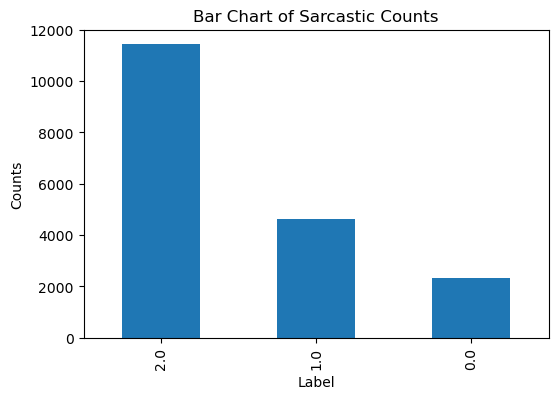

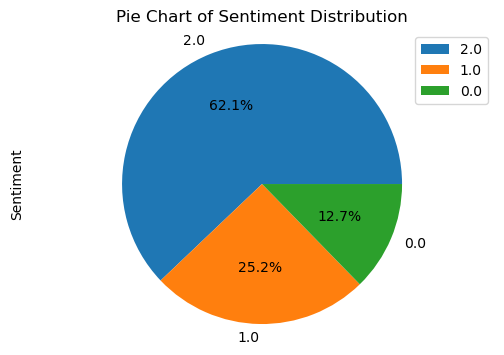

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts
category_counts = df['Sentiment'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Bar Chart of Sarcastic Counts')
plt.show()
print()

# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Sentiment Distribution')

# Add legend
plt.legend()

plt.show()


**Duplicates and Missing Values**

Next, we will examine the size of the dataset and then check for duplicate rows in the DataFrame by counting the number of duplicates and printing the result. Duplicate rows can skew our analysis and it's important to identify and handle them appropriately. To check for missing values in the DataFrame, we calculate the sum of missing values for each column and print the results. Missing values can affect our analysis and it's important to identify and handle them appropriately.

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 18409 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64
Number of Missing Values: 1


Also we replace empty strings with NaN values using the numpy library. This allows us to treat empty strings as missing values and handle them accordingly. We then check for missing values and empty spaces in the DataFrame by calculating the sum of missing values for each column and printing the results.

In [ ]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)


Number of Missing Values by column:
 Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64


**View random samples for each category**

Now we define a function called random_sample_reviews that takes a DataFrame and a number of samples as input. This function groups the data based on the 'Sentiment' column and applies the sample function to select a specified number of samples from each group. The function returns a new DataFrame containing the sampled reviews.

In [ ]:
def random_sample_reviews(df, num_samples):
    # Use groupby on 'Rating' and then apply the sample function to 'Review_Text' of each group
    samples = df.groupby('Sentiment')['Comment'].apply(lambda x: x.sample(num_samples))

    # Convert series to dataframe and reset index
    # samples_df = samples.reset_index()
    samples_df = samples.reset_index().drop(columns='level_1')

    return samples_df
pd.set_option('display.max_colwidth', 200) # This will display up to 100 characters
samples = random_sample_reviews(df, num_samples=3)
samples.head(20)



,Sentiment,Comment
0,0.0,I’m always wondering how those people immediately think we would need to fight back a species that doesn’t even showed itself yet for better or worse
1,0.0,Found out that was out in a rough way\n\nWas watching Prowl8413's Stream yesterday and suddenly someone was having issues with connecting to the SMP world he was on so an hour or so of that stream...
2,0.0,"The price of todays bikes is absolutely bonkers, doesnt make any sense whatsoever if you compare it to motorcycles or even cars"
3,1.0,Aaepalaballayanna.tuopiltteeknsalliaran.hodatanatuwa.aperatakapuballo.tuopi.ltteeknwththa.janadipathimandirakawena.tuopi.aperatahodamahariyavinasakara.nesajyo.ube.ththakarapuwada.apihodatadannawa....
4,1.0,Download GameMaker for free: https://opr.as/GM-MilkManSteve
5,1.0,What should the next mix be titled? 🤔🍃\nListen to on Spotify - https://sptfy.com/lofi-chill
6,2.0,It’s going to be sooo awesome this year and I can’t wait for all the fun we’re gonna have in the livestream! 😃\nI really hope the iPhone 14 Pro’s coming purple. It’s my first time not wanting to b...
7,2.0,"Hi Ozley danke dir sehr für deine tolle video, Es entspannend mich sehr. mach weiter so 🙂"
8,2.0,Very well explained. It took 4hrs straight to keep solving it with all the algorithm in the video. Those trying to solve from this video keep practising the algorithm step by step and solve it


In [ ]:
# Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Data Cleaning**

The next code block defines custom functions for text cleaning and preprocessing. These functions include stripping emojis, removing punctuation, links, mentions, new line characters, and cleaning hashtags. These functions are essential for preparing textual data for further analysis.

In [ ]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE textS

import re

def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

This code applies a series of text cleaning functions to the 'narrative' column of the DataFrame 'df' and assigns the cleaned text to a new column 'new_text'.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18409 entries, 7270 to 15795
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 862.9+ KB


In [ ]:
df['new_text'] = (df['Comment'].astype(str)
                     .apply(strip_emoji)
                     .apply(strip_all_entities)
                     .apply(clean_hashtags)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))

**Text Length**

The code calculates the length of each text in the 'new_text' column

In [ ]:
df['text_len'] = df['new_text'].apply(lambda x: len(str(x).split()))

**Visualize text with low word frequency**

A count plot is generated to visualize the distribution of texts with less than 1 word, filtering the data based on the 'text_len' column.

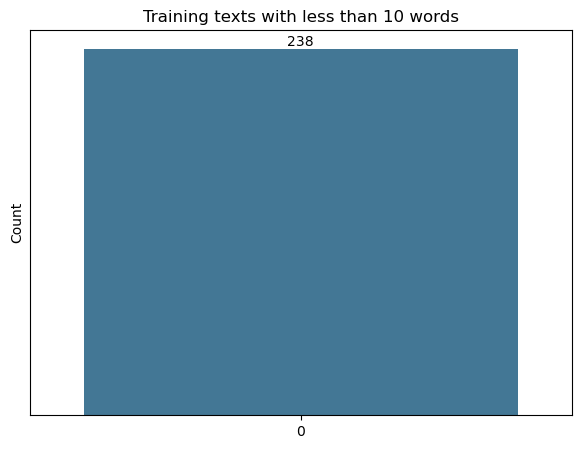

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<1], palette='mako')
plt.title('Training texts with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()


We filter the DataFrame to remove rows with text lengths less than 2 because they are either empty rows or do not carry much insight.

In [ ]:
data_head=df[df['text_len']<2]
data_head.head(30)

,Unnamed: 0,Video ID,Comment,Likes,Sentiment,new_text,text_len
16834,16834,y4nYf9j04Nk,अनलिमिटेड बॉलीवुड मूवीज का मजा लेने के लिए हमें जल्दी व्हॉट्स ऍप कीजिये.\r\nयहाँ क्लिक करे http://api.whatsapp.com/send?phone=918097426767&text=Hello_Movies\r\nऔर सेंड बटन पर क्लिक करे. जल्दी करे .,96.0,1.0,,0
16873,16873,GGhIbQyz_x4,কমেন্ট পড়তে আশা\n পাবলিক গুলো কে দেখতে\n চাই..!😍😇,283.0,1.0,,0
16064,16064,8Ltc-BfxBhY,จกป็อปคอร์นรอ.. ❤️‍🔥,131.0,2.0,,0
2571,2571,cG37cEi1nPc,ตอนโควิดก็ขายดีจนทำไม่ทัน โควิดหายคนก็ใช้น้อยลง,0.0,1.0,,0
4352,4352,ulLge_FqRyI,Magic😲😲😲,1.0,1.0,magic,1
11095,11095,dyaqjsRkKyY,Beautiful,1.0,2.0,beautiful,1
8191,8191,cbwLTBpis-s,"Ты такая милая здесь))) Скучал по твоим новым видео. Спасибо, Геля🤗",30.0,1.0,,0
11031,11031,9vfFQ-X95lk,👍❤️🔥Спасибо за смешную подборку о животных! Смеялась от души! ❤️❤️❤️,0.0,2.0,,0
828,828,CBNHQyXOcjE,विवादित कैसे है? \nसाबित करो\nजो उस में लिखा \nउसको पढने मात्र से विवाद \nहो जाता है तो उस को मिटा दो ?,30.0,1.0,,0
1163,1163,qR12rWDMjls,"আমার প্রিয় মুসলমান ভাই ও বোনেরা , 🙂🙂 ফ্রিজে পানি রাখলে যেমন পানি ঠান্ডা হয় 🥰🥰 তেমনি নামাজ পড়লে মন ঠান্ডা হয়ে যায় 😍😍 সুবহানাল্লাহ 💝",5.0,1.0,,0


We plot a histogram to visualize the distribution of text lengths in the DataFrame. The histogram helps us understand the spread of text lengths and identify any significant outliers or patterns.

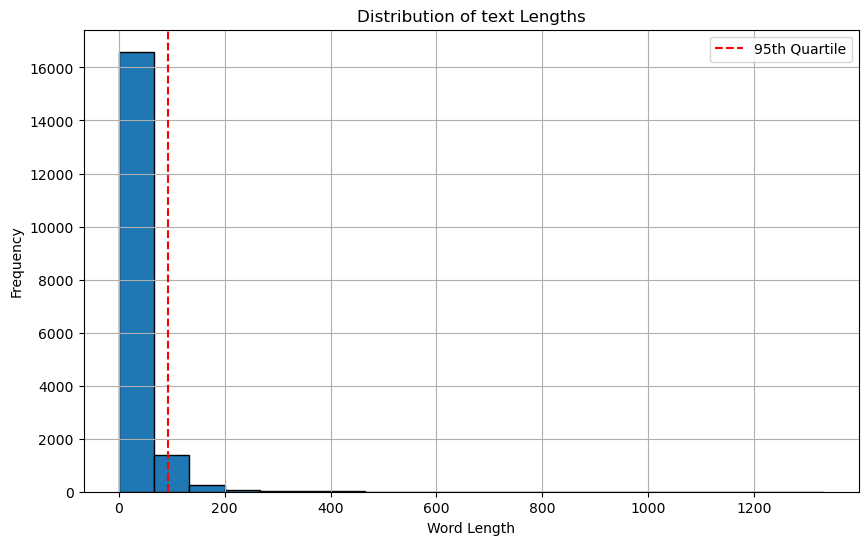

In [ ]:
text_lengths = [len(text.split()) for text in df["new_text"]]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()

Descriptive statistics of the text lengths are displayed using the describe method of the DataFrame 'df.text_len'.

In [ ]:
df['text_len'].describe()

count    18409.000000
mean        32.682221
std         45.229630
min          0.000000
25%         12.000000
50%         21.000000
75%         38.000000
max       1331.000000
Name: text_len, dtype: float64

Remove the rows.

In [ ]:
data = df[df['text_len'] >= 1]

In the next code block, we drop specified columns from the DataFrame. This is done to remove unnecessary or irrelevant columns from the data, focusing only on the relevant features.

In [ ]:
columns_to_drop = ['Comment', 'Likes', 'Unnamed: 0']

# Drop the specified columns
data.drop(columns_to_drop, axis=1, inplace=True)

/tmp/ipykernel_32/1115584085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns_to_drop, axis=1, inplace=True)


**Handling Inbalanced Classes**

We use the RandomOverSampler from the imbalanced-learn library to balance the class distribution in the data. This is important when dealing with imbalanced datasets where one class is overrepresented. The function oversamples the minority class to match the majority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(data['new_text']).reshape(-1, 1), np.array(data['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['new_text', 'Sentiment']);

We check the value counts of the target variable in the oversampled training dataset to ensure that the classes are balanced.

In [ ]:
train_os['Sentiment'].value_counts()

2.0    11384
1.0    11384
0.0    11384
Name: Sentiment, dtype: int64

**Define Features, X & Labels, y**

In the next code block, the text data (X) and the encoded labels (y) are extracted from the DataFrame. This prepares the data for training a machine learning model.

In [ ]:
X = train_os['new_text'].to_numpy()
y = train_os['Sentiment'].to_numpy()

**Train-Test Split**

The data is then split into training and validation sets using the train_test_split function. This is a common practice to evaluate the performance of a model on unseen data.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((27321,), (27321,))

**One Hot Encode labels**

Next, the original encoded labels are copied to new variables for further processing. This is done to keep the original encoded labels intact and make modifications on the new variables if needed.

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()

The next code block performs one-hot encoding on the labels using the OneHotEncoder from scikit-learn. One-hot encoding is used to represent categorical variables as binary vectors. This is important when working with multi-class classification problems.

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_valid = one_hot_encoder.transform(np.array(y_valid).reshape(-1, 1))

# Check what training labels look like
y_train.shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(27321, 3)

In [ ]:
# Check the lengths
len(X_train), len(X_valid), len(y_train), len(y_valid)

(27321, 6831, 27321, 6831)

In [ ]:
# View the first 10 training sentences and their labels
X_train[:10], y_train[:10]

(array(['ah man usually these are hilarious but this teacher seems really kind just trying to do his job',
        'technically ramp buggy isnt suppose to be used as an offroad vehicle it is a street vehicle thats classified as offroad because its pretty much a buggy with a ramp on its hood to windshield',
        'i was solving it whole night with your trick and finally it didnt solve',
        'subscribe or i kick you',
        'just passing by to say that im loving her course and excellent diction',
        'i havent laughed like this for years oh my gosh arun youve nailed this one wendi',
        '1 come up with a pacing strategy 2 review previous tests 3 rework old mistakes 4 review concepts youre always struggle with',
        'i love it so much its so cute',
        'a minha famlia e eu gostamos muito dos seus vdeos',
        'we all know john cenas return from this year shouldve been on there'],
       dtype=object),
 array([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 

**Text Length in Training Data**

The average number of tokens (words) in the training texts is calculated to get an idea of the text length. This information can be useful for setting the input size of a neural network model.

In [ ]:
# Find average number of tokens (words) in training texts
round(sum([len(i.split()) for i in X_train])/len(X_train))

35

The length of each text in the training set is calculated and the 95th percentile is determined. This helps in understanding the distribution of text lengths and deciding on the appropriate sequence length for text processing.

In [ ]:
# Calculate the length of each text in X_train
text_lengths = [len(text.split()) for text in X_train]

# Find the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of text Lengths: {quartile_95}")

95th Quartile of text Lengths: 105.0


A histogram is plotted to visualize the distribution of text lengths. This provides a visual representation of the frequency of text lengths in the dataset.

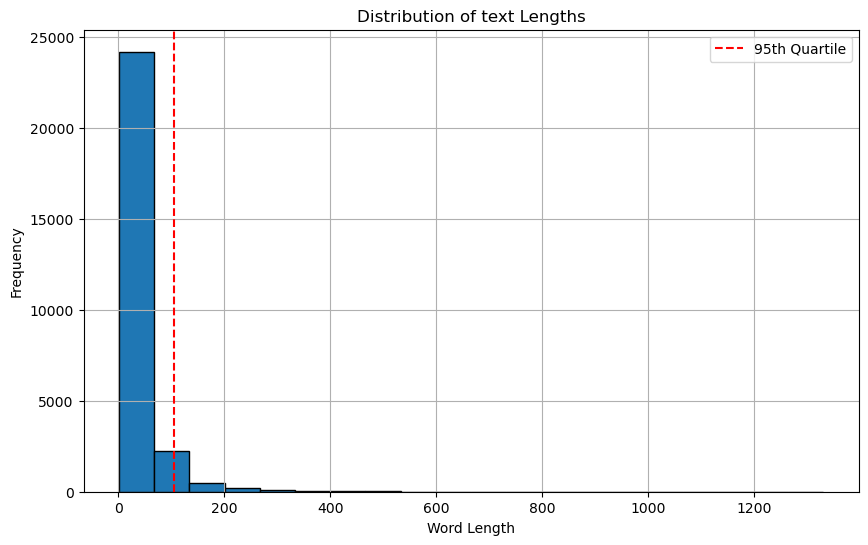

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()


The maximum text length is calculated to determine the maximum sequence length that the model can handle. This information is important for padding or truncating the sequences during preprocessing.

In [ ]:
max_text_length = max(text_lengths)
print(f"Maximum text Length: {max_text_length}")

Maximum text Length: 1331


**TextVectorization**

TextVectorization is set up with custom variables such as the maximum vocabulary length and the maximum sequence length. These variables define the size of the vocabulary and the length of the sequences.

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length =None
max_length = int(quartile_95) # max length our sequences will be (e.g. how many words from a text does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

The text vectorizer is fitted to the training text to build the vocabulary based on the training data. This allows the vectorizer to learn the mapping between words and their integer representations.

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

The unique words in the vocabulary are extracted, and the most common and least common words are printed. This helps in understanding the composition of the vocabulary and identifying any uncommon or special tokens.

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 34984
Top 5 most common words: ['', '[UNK]', 'the', 'to', 'and']
Bottom 5 least common words: ['003', '002', '000905', '0003', '000222']


The maximum vocabulary length is updated with the actual length of the vocabulary obtained from the text vectorizer.

In [ ]:
# max_vocab_length=total_number_words
max_vocab_length=len(words_in_vocab)

In [ ]:
max_vocab_length, max_length

(34984, 105)

We determine the number of classes based on the shape of the training labels.

In [ ]:
num_classes=y_train.shape[1]
num_classes

3

**Embedding layer**

Here an embedding layer is set up, converting input words into dense vectors of fixed size. This representation captures semantic relationships between words. tf.random.set_seed(42) ensures reproducibility by fixing the randomness.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers

**Model: USE**

The following code outlines the construction and training of a text classification model utilizing Google's Universal Sentence Encoder (USE) from TensorFlow Hub. The USE layer, pre-trained on a vast corpus of data, takes sentences as input and encodes them into high-dimensional vectors. This layer is non-trainable, meaning it maintains the pre-trained weights and functions as a feature extractor. The encoded vectors are then passed through a dense layer with 'relu' activation, and finally, an output layer with softmax activation suitable for multiclass classification. The model is compiled with the Adam optimizer and categorical cross-entropy loss.

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_1 = tf.keras.Sequential([
sentence_encoder_layer, # take in sentences and then encode them into an embedding
layers.Dense(512, activation="relu"),
layers.Dense(num_classes, activation="softmax")
], name="model_1_USE")

# Compile model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.summary()

Model: "model_1_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 257,062,019
Trainable params: 264,195
Non-trainable params: 256,797,824
_________________________________________________________________


A ModelCheckpoint callback is set to save only the best model weights, as determined by validation accuracy.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path
checkpoint_path = "best_model_USE"

# Create a ModelCheckpoint callback that saves the model's weights only when the validation accuracy improves
cc = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)


The model training is done on trainig set, with validation data provided and a checkpoint callback ensuring the saving of the best model.

In [ ]:
# Train a classifier on top of pretrained embeddings
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=30,
                              validation_data=(X_valid, y_valid),
                              callbacks=[cc])

Epoch 1/30
852/854 [============================>.] - ETA: 0s - loss: 0.5921 - accuracy: 0.7560
Epoch 1: val_accuracy improved from -inf to 0.78583, saving model to best_model_USE
854/854 [==============================] - 28s 30ms/step - loss: 0.5924 - accuracy: 0.7559 - val_loss: 0.5189 - val_accuracy: 0.7858
Epoch 2/30
853/854 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8172
Epoch 2: val_accuracy improved from 0.78583 to 0.83004, saving model to best_model_USE
854/854 [==============================] - 32s 37ms/step - loss: 0.4676 - accuracy: 0.8171 - val_loss: 0.4348 - val_accuracy: 0.8300
Epoch 3/30
853/854 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8720
Epoch 3: val_accuracy improved from 0.83004 to 0.86883, saving model to best_model_USE
854/854 [==============================] - 27s 32ms/step - loss: 0.3572 - accuracy: 0.8720 - val_loss: 0.3594 - val_accuracy: 0.8688
Epoch 4/30
853/854 [============================>.] - E

The model demonstrating the best validation accuracy is loaded for use in subsequent steps.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_1 = load_model(checkpoint_path)

Next, the model is evaluated on the validation set, where probabilities are predicted and converted into class predictions.

In [ ]:
# Make predictions with USE TF Hub model
model_1_pred_probs = model_1.predict(X_valid)
model_1_pred_probs[:10]

214/214 [==============================] - 3s 14ms/step


array([[9.9761003e-01, 2.3893826e-03, 4.3665676e-07],
       [9.9854666e-01, 1.4421073e-03, 1.1138301e-05],
       [6.6531106e-04, 9.7009301e-01, 2.9241683e-02],
       [5.4074484e-05, 9.9316126e-01, 6.7845918e-03],
       [6.2163830e-10, 9.9999326e-01, 6.7301658e-06],
       [9.9994200e-01, 5.0132287e-05, 7.7840550e-06],
       [9.9996465e-01, 1.5004454e-05, 2.0213820e-05],
       [9.9457736e-13, 2.0044392e-05, 9.9997991e-01],
       [1.2329544e-05, 9.9244344e-01, 7.5441622e-03],
       [3.1366679e-05, 9.9996561e-01, 3.0005388e-06]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 1, 1, 1, 0, 0, 2, 1, 1])>

Then a function calculate_results is defined to calculate the accuracy, precision, recall, and F1 score of the model's predictions.

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

Various performance metrics such as accuracy, precision, recall, and the F1-score are calculated for the model.

In [ ]:
# Calculate model performance metrics
model_1_results = calculate_results(y_valid_le, model_1_preds)
model_1_results

{'accuracy': 93.92475479432001,
 'precision': 0.9397547556362652,
 'recall': 0.9392475479432001,
 'f1': 0.9387870853248709}

The following code block defines a function called make_confusion_matrix to create a labeled confusion matrix. This matrix compares the predicted labels with the ground truth labels, visualizing the performance of the model.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


The class_names variable stores the sentiment labels from the dr DataFrame as a list.

In [ ]:
class_names=dr.Sentiment.tolist()
class_names

['Negative', 'Neutral', 'Positive']

The make_confusion_matrix function is then used to generate a confusion matrix for the predicted labels (y_pred_categorical) and the ground truth labels (y_true_categorical).

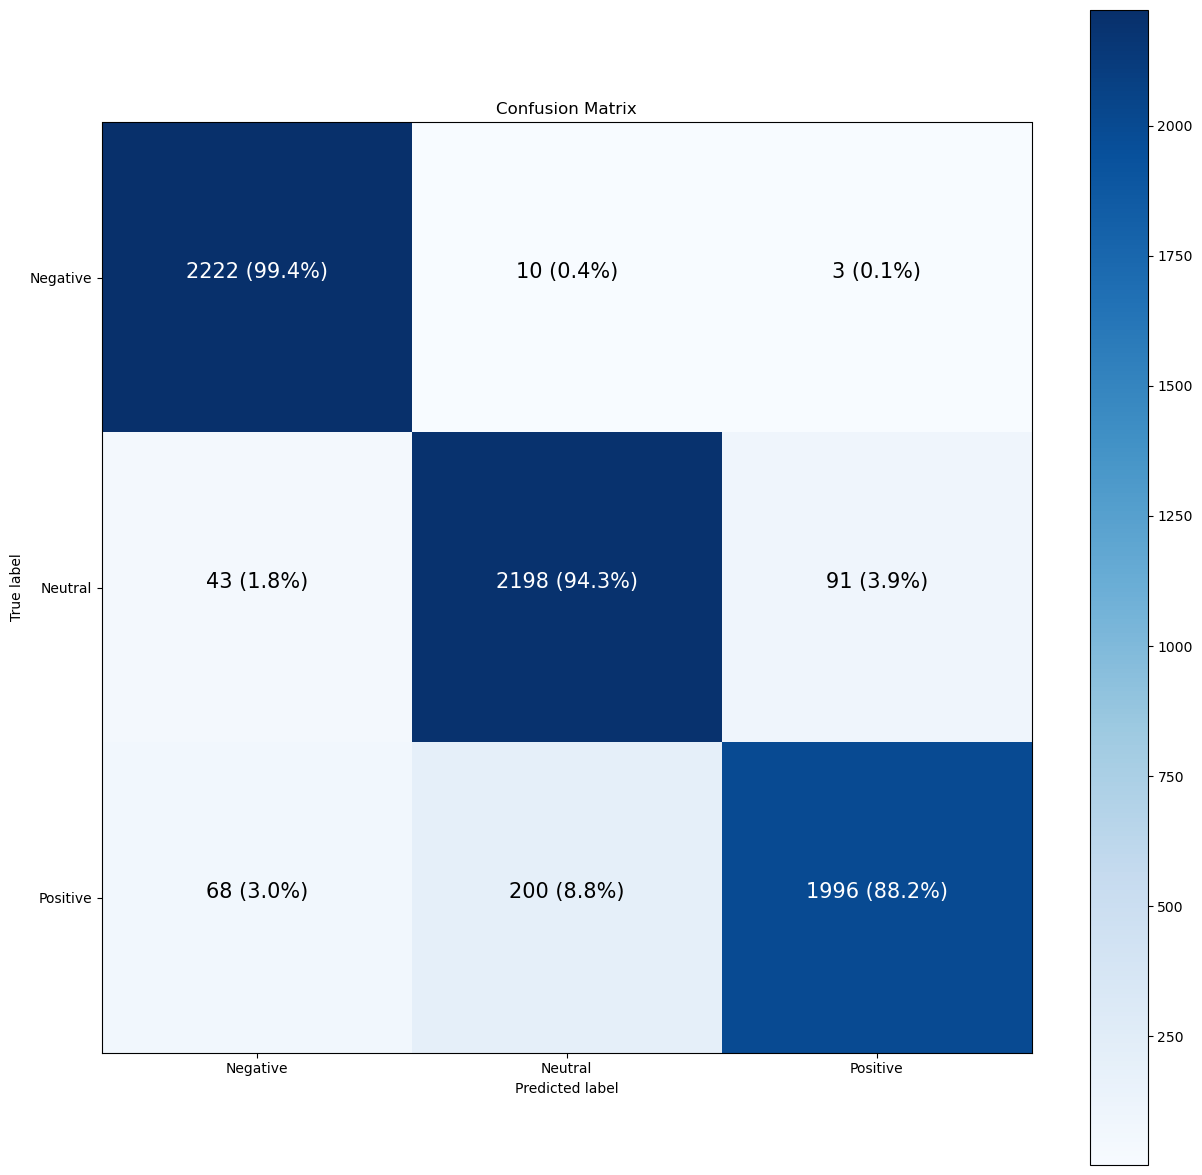

In [ ]:
make_confusion_matrix(y_true=y_valid_le,
                      y_pred=model_1_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=15)


The next code block prints a classification report, which provides various performance metrics such as precision, recall, F1-score, and support for each class. It evaluates the model's performance by comparing the predicted labels (model_1_preds) with the ground truth labels (y_valid).

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_le, model_1_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2235
         1.0       0.91      0.94      0.93      2332
         2.0       0.96      0.88      0.92      2264

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



**Visualize Predictions**

The random_predictions function takes a model, validation data (X_valid and y_valid), and an optional number of samples as input. It selects random samples from the validation data, makes predictions using the model, and prints the text, true label, and predicted label for each random sample. This function is useful for inspecting individual predictions and understanding how the model performs on specific samples.

In [ ]:
from colorama import Fore, Style

def random_predictions(model, X_valid, y_valid, num_samples=5, class_names=None):
    # Check if it's binary or multi-class classification
    num_classes = y_valid.shape[1] if len(y_valid.shape) > 1 else 2
    is_binary_classification = num_classes == 2

    # Getting indices of the random samples
    random_indices = np.random.choice(np.arange(len(X_valid)), size=num_samples, replace=False)

    # Selecting the random samples
    random_X_samples = X_valid[random_indices]
    random_y_samples = y_valid[random_indices]

    # Making predictions on the random samples
    y_pred_probs = model.predict(random_X_samples)

    if is_binary_classification:
        y_pred = np.squeeze(np.round(y_pred_probs).astype(int))
    else:
        y_pred = np.argmax(y_pred_probs, axis=1)

    # Print the actual and predicted labels
    for i in range(num_samples):
        text = random_X_samples[i]
        true_label = np.argmax(random_y_samples[i]) if not is_binary_classification else np.squeeze(random_y_samples[i])
        predicted_label = y_pred[i]

        # If class names are provided, use them for printing
        if class_names is not None:
            true_label_name = class_names[true_label]
            predicted_label_name = class_names[predicted_label]
        else:
            true_label_name = true_label
            predicted_label_name = predicted_label

        # Determine the color of the text (green for correct, red for incorrect)
        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)


In [ ]:
class_names

['Negative', 'Neutral', 'Positive']

In [ ]:
random_predictions(model_1,
                   X_valid,
                   y_valid,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 26ms/step

Sample 1:
Text: jogo bom s ano que vem mesmo at l galera
True: Neutral 
 Predicted: Neutral

Sample 2:
Text: my mood was not good enough after seeing the animated video and listening music my mind says its okay that happened really i am having some motivations as well and thanks for your musics
True: Neutral 
 Predicted: Neutral

Sample 3:
Text: hi sister i m happy see you again
True: Positive 
 Predicted: Positive

Sample 4:
Text: this is an excellent interview it gives hope for anyone who wishes to change their lives thank you to john for being so honest i wish him luck on his road to redemption
True: Positive 
 Predicted: Positive

Sample 5:
Text: i havent finished yet but wonderful explanations and great examples so far with teachers like this learning is a joy
True: Positive 
 Predicted: Positive

Sample 6:
Text: best content ever never seem to disappoint me
True: Positive 
 Predicted: Positive

Sample 7:
Text: still very disapp